https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

# Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Loading the Dataset:

In [2]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first few rows of the dataset
print("Dataset preview:")
print(df.head())

Dataset preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Exploratory Data Analysis (EDA):

In [3]:
print("\nDataset info:")
df.info


Dataset info:


<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

<li>CustomerID : Unique ID assigned to the customer</li>
<li>Gender : Gender of the customer</li>
<li>Age : Age of the customer</li>
<li>Annual Income (k$) : Annual Income of the customer</li>
<li>Spending Score (1-1000) : Score assigned by the mall based on customer behavior and spending nature</li>

In [4]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
def explore_data(data):
    """
    Explores the dataset by displaying major moments, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    Returns:
        None
    """
    # Display major moments
    moments = pd.DataFrame({
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    })
    print("Major Moments:")
    print(moments)
    print("\n")
   
# Example usage:
explore_data(df)

Major Moments:
                          Mean  Median  Standard Deviation  Skewness  Kurtosis
CustomerID              100.50   100.5           57.879185  0.000000 -1.200000
Age                      38.85    36.0           13.969007  0.485569 -0.671573
Annual Income (k$)       60.56    61.5           26.264721  0.321843 -0.098487
Spending Score (1-100)   50.20    50.0           25.823522 -0.047220 -0.826629




C:\Users\CORE COM\AppData\Local\Temp\ipykernel_9984\4100177327.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Mean': data.mean(),
C:\Users\CORE COM\AppData\Local\Temp\ipykernel_9984\4100177327.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Median': data.median(),
C:\Users\CORE COM\AppData\Local\Temp\ipykernel_9984\4100177327.py:15: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated.

The CustomerID statistics reveal a dataset size of 200 observations, with a mean value of 100.5 and a standard deviation of approximately 57.88. Age exhibits a mean of 38.85 years, with a standard deviation of around 13.97. Annual Income indicates an average income of 60.56k, with a standard deviation of 26.26k. The Spending Score (1-100) shows an average score of 50.2, with a standard deviation of 25.82. 

In [6]:
# Checking for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


There are no missing values observed across any of the variables, including CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1-100). This suggests that the dataset is complete and ready for analysis without the need for imputation or data cleaning procedures.







In [7]:
# Drop 'CustomerID' column
df.drop(columns='CustomerID', inplace=True)

In [8]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Gender
Numerical Features : Age Annual Income (k$) Spending Score (1-100)


<li>Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.</li>
<li>Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.</li>

In [9]:
def plot_correlation_matrix(dataframe):
    """
    Plot the correlation matrix for a given DataFrame.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.

    Returns:
    None

    Example:
    plot_correlation_matrix(df)
    """
    plt.figure(figsize=(6, 6))
    sns.heatmap(dataframe.corr(), cmap='inferno', annot=True, cbar=True, square=True)
    plt.title('Correlation Matrix')
    plt.show()


C:\Users\CORE COM\AppData\Local\Temp\ipykernel_9984\1189903536.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), cmap='inferno', annot=True, cbar=True, square=True)


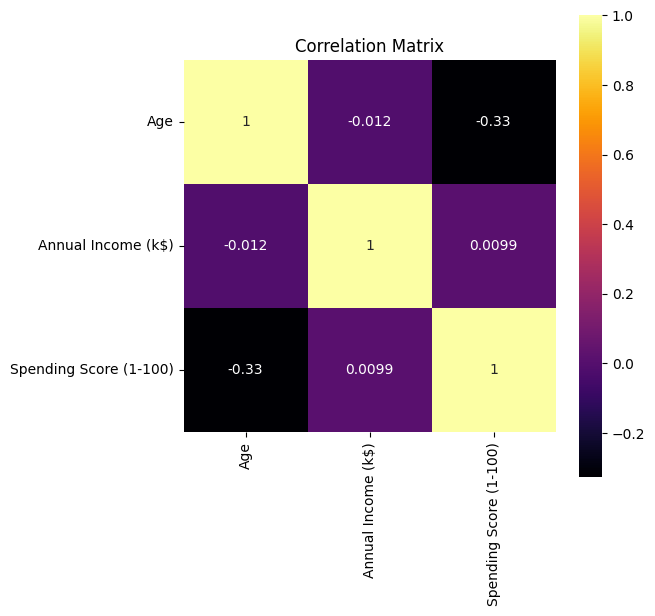

In [10]:
plot_correlation_matrix(df)

<li>CustomerID displays a very high positive correlation with Annual Income as the customers are arranged in ascending order according to their Annual Income.We are not going to include CustomerID for modeling purpose.</li>

<li>Gender does not display any relation with other features. It is pretty much neutral with all the values sticking to 0.</li>

<li>Spending Score (1-100) and Age display a negative correlation i.e if value of one feature increases, then another feature's value decreases and vice-versa is true!</li>

In [11]:
def plot_age_income_gender(dataframe):
    """
    Plot the relationship between Age and Annual Income with respect to Gender.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.

    Returns:
    None

    Example:
    plot_age_income_gender(df)
    """
    plt.figure(figsize=(6, 6))
    for gender in ['Male' , 'Female']:
        plt.scatter(x='Age', y='Annual Income (k$)', data=dataframe[dataframe['Gender'] == gender],
                    s=200, alpha=0.5, label=gender)
    plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
    plt.title('Age vs Annual Income w.r.t Gender')
    plt.legend()
    plt.show()

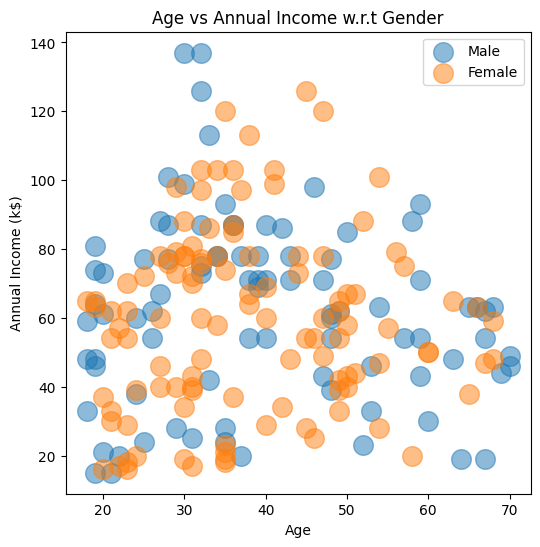

In [12]:
plot_age_income_gender(df)

By visually contrasting income distributions across age groups for both genders, the plot illuminates potential gender disparities in income levels and highlights any outliers or unique segments within the data.

C:\Users\CORE COM\AppData\Local\Temp\ipykernel_9984\3400058657.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=dataframe, palette='Set1')


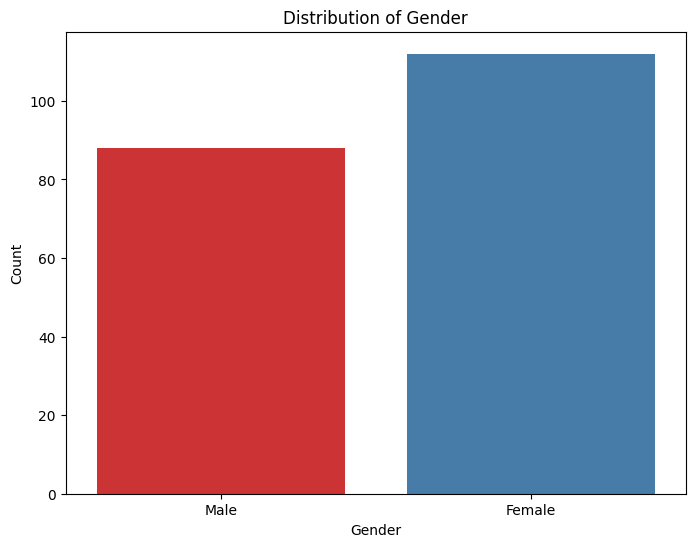

In [13]:
def plot_categorical_graph(dataframe, column):
    """
    Generate a categorical graph comparing multiple categories in the specified column.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.
    column (str): The name of the column for which the categorical graph will be generated.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=dataframe, palette='Set1')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
# Plot categorical graph for 'Gender'
plot_categorical_graph(df, 'Gender')

The analysis of the gender distribution plot reveals a notable disparity between male and female representation within the dataset, with females outnumbering males. This finding suggests a gender imbalance in the dataset, where the number of female customers exceeds that of males. 

In [14]:
def plot_numerical_features_by_gender(dataframe, numerical_features):
    """
    Plot boxplots and violin plots for each numerical feature against Gender.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.
    numerical_features (list): A list of numerical feature names.

    Returns:
    None

    Example:
    plot_numerical_features_by_gender(df, numerical_features)
    """
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
    for i, feature in enumerate(numerical_features):
        plt.subplot(3, 2, (i * 2) + 1)
        ax = sns.boxplot(x='Gender', y=feature, palette='Set1', data=dataframe)
        ax.set_xticklabels(['Female', 'Male'])
        title = feature + ' vs Gender (Boxplot)'
        plt.title(title)

        plt.subplot(3, 2, (i * 2) + 2)
        ax = sns.violinplot(x='Gender', y=feature, palette='Set1', data=dataframe)
        ax.set_xticklabels(['Female', 'Male'])
        title = feature + ' vs Gender (Violinplot)'
        plt.title(title)

    plt.tight_layout()
    plt.show()


C:\Users\CORE COM\AppData\Local\Temp\ipykernel_9984\1648088467.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Gender', y=feature, palette='Set1', data=dataframe)
C:\Users\CORE COM\AppData\Local\Temp\ipykernel_9984\1648088467.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])
C:\Users\CORE COM\AppData\Local\Temp\ipykernel_9984\1648088467.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Gender', y=feature, palette='Set1', data=dataframe)
C:\Users\CORE COM\AppData\Local\Temp\ipykernel_9984\1648088467.py:25: UserWarning: set_ticklabels() shou

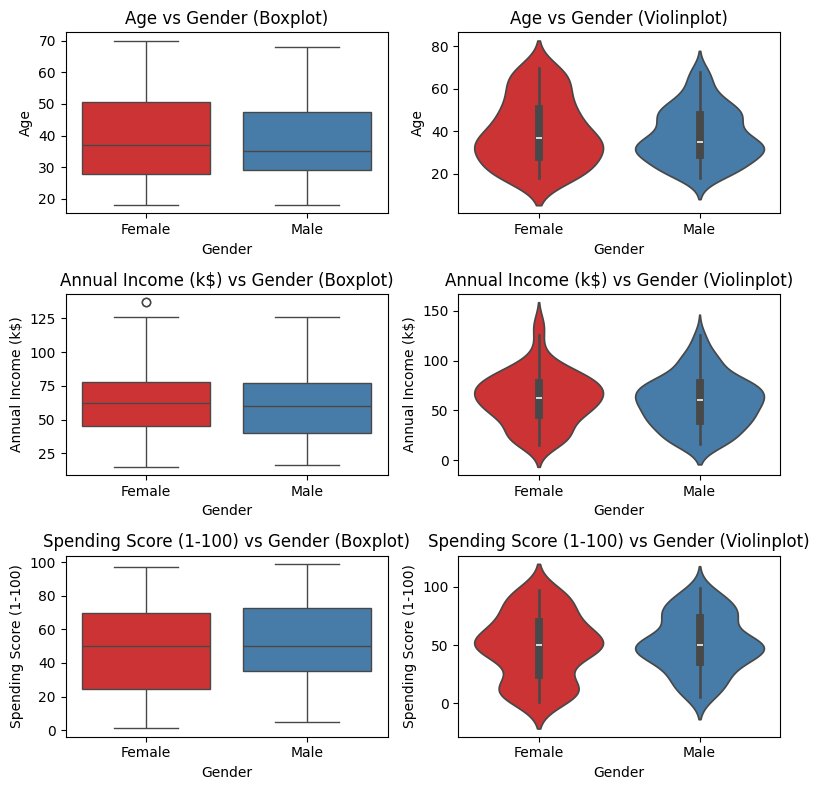

In [15]:
plot_numerical_features_by_gender(df,numerical_features)

<li>Age range of female customers is from 30 to just below 50 whereas male customers Age ranges from just below 30 to 50.</li>
<li>For both Genders, a bulge at the age of 30 - 35 can be observed. Median Age of male is slightly more than those of female.</li>
<li>For Annual Income (k$), female customer's income starts from 40k whereas male customer's is above this value.</li>

<li>Median Annual Income (k$) for both Genders is near about 60k. Annual Income (k$) of male customers tapers very sharply at the apex with some outliers as compared to female customers.</li>
<li>Median Spending Score (1-100) of both Genders is same despite having different starting points of just below 40 & just above 20 for female and male customers respectively.</li>
<li>Both the Genders display a strong bulge at the median value especially female customers. However, male customers display a small but significant bulge in the range of 0 - 20 as well.</li>

In [16]:
# Data Preprocessing
# Encode categorical variable Gender
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

In [17]:
# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [18]:
# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [19]:
# Fitting
# Splitting data into train and test sets
X = df_scaled.drop('Annual Income (k$)', axis=1)
y = df_scaled['Annual Income (k$)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Linear Regression:

In [20]:
def fit_linear_regression_model(dataframe, X, y):
    """
    Fit a linear regression model using the provided features and target variable.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.
    X (DataFrame): The features used for training the model.
    y (Series): The target variable to be predicted.

    Returns:
    LinearRegression: The trained linear regression model.

    Example:
    model = fit_linear_regression_model(df_scaled, X_train, y_train)
    """
    # Fitting linear regression model
    reg = LinearRegression()
    reg.fit(X, y)

    return reg


In [21]:
linear_model=fit_linear_regression_model(df_scaled,X_train,y_train)

In [22]:
# Making predictions
y_pred = linear_model.predict(X_test)

In [23]:
# Evaluation
# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Model Evaluation:
Mean Squared Error: 0.6887947453197438
R-squared Score: -0.053701381018529615


The Mean Squared Error (MSE) of 0.6887 indicates the average squared difference between actual and predicted values, suggesting a moderate level of prediction error. Conversely, the negative R-squared Score of -0.0537 signifies that the linear regression model does not fit the data well and performs worse than a horizontal line, indicating poor explanatory power beyond random chance. 

In [24]:
def plot_actual_vs_predicted(y_test, y_pred):
    """
    Plot a scatter plot for fitting with regression line, confidence interval, and error bars.

    Parameters:
    y_test (Series): The actual values of the target variable.
    y_pred (array-like): The predicted values of the target variable.

    Returns:
    None

    Example:
    plot_actual_vs_predicted(y_test, y_pred)
    """
    plt.figure(figsize=(6, 6))
    sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'alpha':0.6})
    plt.title('Actual vs Predicted (Fitting)')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

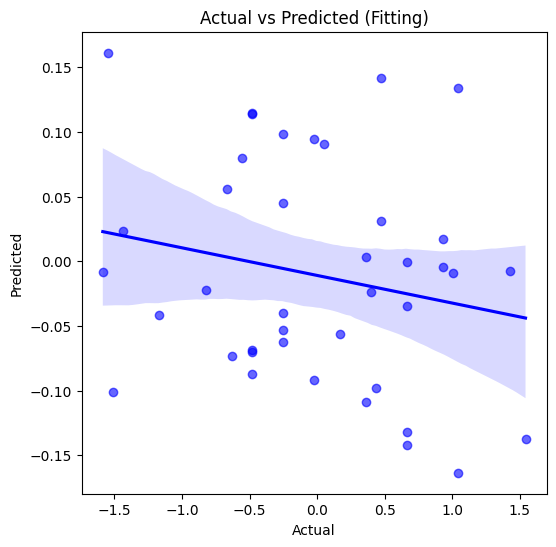

In [25]:
plot_actual_vs_predicted(y_test,y_pred)

The scatter plot from the plot_actual_vs_predicted function visually compares actual and predicted values of the target variable. It helps assess the model's accuracy by observing how closely data points align with the regression line. The confidence interval indicates prediction uncertainty, aiding in understanding the reliability of the model's forecasts.

# Clustering:

In [26]:
def plot_elbow_curve(dataframe):
    """
    Determine the optimal number of clusters using the elbow method and plot the elbow curve.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the scaled data.

    Returns:
    None

    Example:
    plot_elbow_curve(df_scaled)
    """
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(dataframe)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

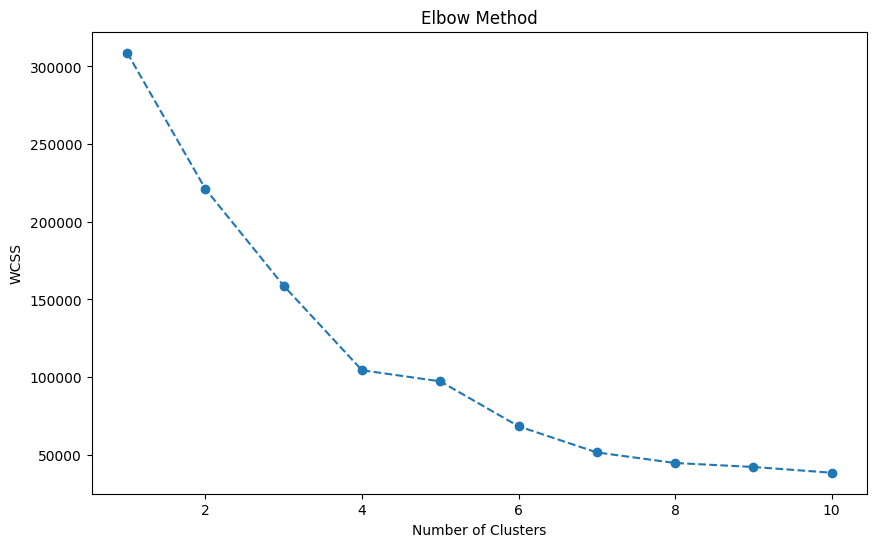

In [27]:
plot_elbow_curve(df)

The elbow method suggests that selecting 5 clusters would be appropriate for partitioning the data effectively. By observing the point where the within-cluster sum of squares (WCSS) starts to decrease at a slower rate (resembling an "elbow" shape), we can determine an optimal number of clusters. In this case, the observed elbow point indicates that 5 clusters would sufficiently capture the underlying patterns within the data while avoiding overfitting or underfitting.




In [28]:
def perform_kmeans_clustering(dataframe, n_clusters):
    """
    Perform K-means clustering on the provided data and assign cluster labels.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the scaled data.
    n_clusters (int): The number of clusters to form.

    Returns:
    DataFrame: The input DataFrame with an additional 'Cluster' column containing the cluster labels.
    """
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    dataframe['Cluster'] = kmeans.fit_predict(dataframe)

    return dataframe,kmeans

In [29]:
data,kmeans=perform_kmeans_clustering(df_scaled,5)

The perform_kmeans_clustering function conducts K-means clustering on the scaled data within the DataFrame, utilizing a specified number of clusters. It assigns cluster labels to each data point, enhancing data segmentation based on similarity. This method facilitates insightful analysis by unveiling underlying patterns or groups within the dataset.







In [30]:
def visualize_clusters(dataframe):
    """
    Visualize the clusters of customers based on age and annual income.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the cluster labels.

    Returns:
    None

    Example:
    visualize_clusters(df)
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=dataframe, palette='Set1', s=100, alpha=0.8)
    plt.title('Clusters of Customers')
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
    plt.legend(title='Cluster')
    plt.show()

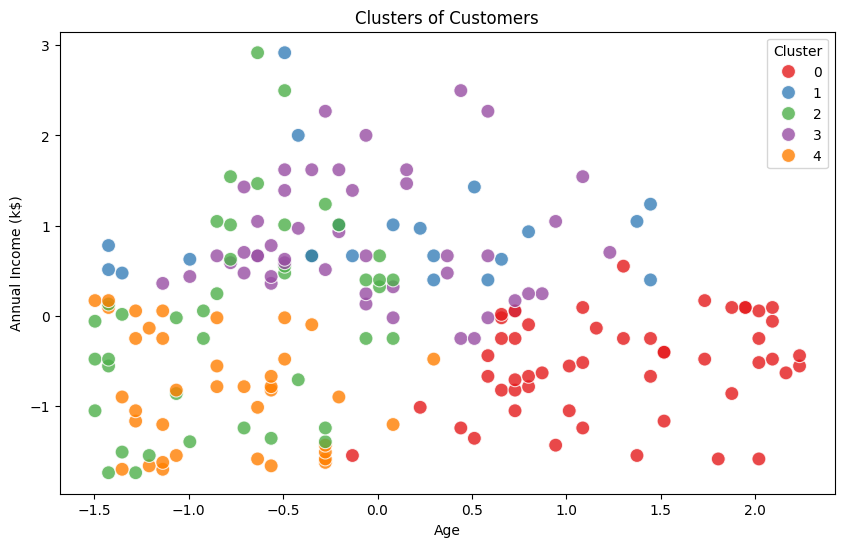

In [31]:
visualize_clusters(df_scaled)

Each point on the plot represents a customer, with different clusters distinguished by unique colors. By visualizing the clusters, trends and patterns in customer demographics and spending behaviors can be easily identified, aiding in targeted marketing strategies and personalized customer engagement initiatives.







In [32]:
# Assess the quality of the clustering using silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(kmean_model, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

NameError: name 'kmean_model' is not defined

The Silhouette Score of 0.38 suggests a moderate level of separation between the clusters, indicating that the clustering algorithm has successfully identified meaningful distinctions within the data.